In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# İlk birkaç satırın görüntülenmesi
data.head()


Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [3]:
# Veri setinin genel bilgileri
data.info()

# Veri setindeki özet istatistikler
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Id          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219    0.097439    2.103739  
min      0.000000    5.430000    0.000000    0.000000    1.000000  
25%      0.122500    8.240000    0.000000    0.000000    1.000000  
50%      0.555000    8.600000    0.000000    0.000000    2.000000  
75%      0.610000    9.172500    0.000000    0.100000    3.000000  
max      6.210000   16.190000    3.150000    0.510000    7.000000

In [4]:
# Eksik değerlerin kontrolü
missing_values = data.isnull().sum()
missing_values


Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
# Sınıf dağılımının incelenmesi
class_distribution = data['Type'].value_counts()
class_distribution


2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

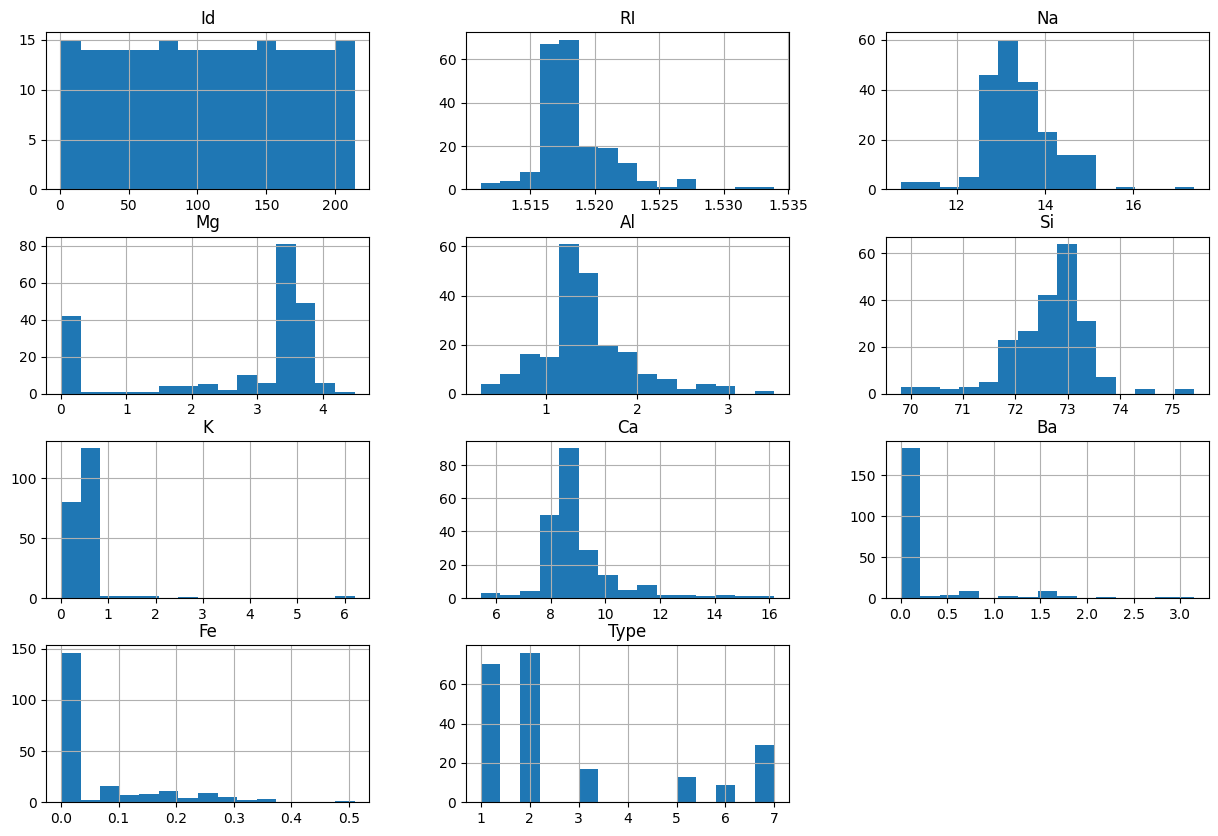

In [6]:
# Özelliklerin histogram grafikleri
data.hist(bins=15, figsize=(15, 10))
plt.show()


Veri Setinin İlk Satırları:
   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Veri Setinin Genel Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      21

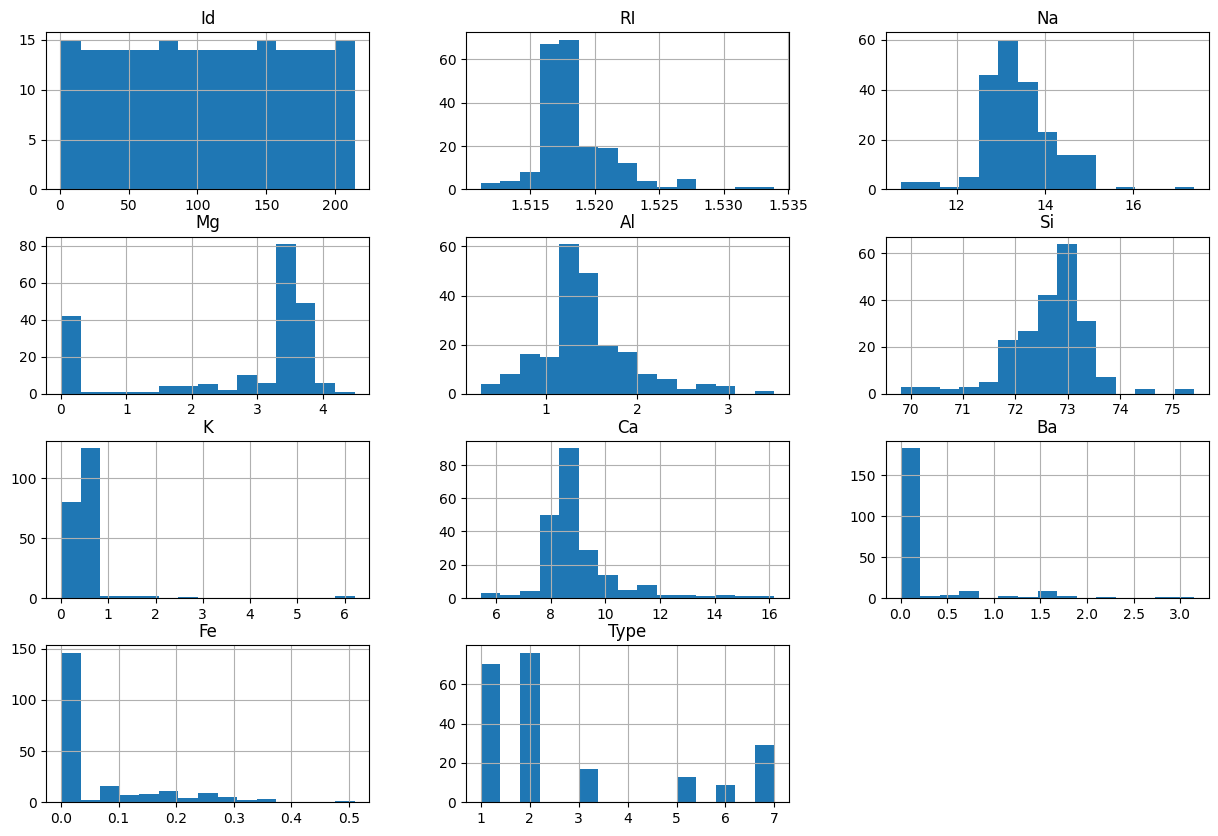


Korelasyon Matrisi:
            Id        RI        Na        Mg        Al        Si         K  \
Id    1.000000 -0.072209  0.375722 -0.650328  0.490113  0.061232  0.003149   
RI   -0.072209  1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833   
Na    0.375722 -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087   
Mg   -0.650328 -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396   
Al    0.490113 -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958   
Si    0.061232 -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331   
K     0.003149 -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000   
Ca    0.090800  0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836   
Ba    0.451001 -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618   
Fe   -0.072794  0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719   
Type  0.877357 -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054   

            Ca        Ba        Fe      Ty

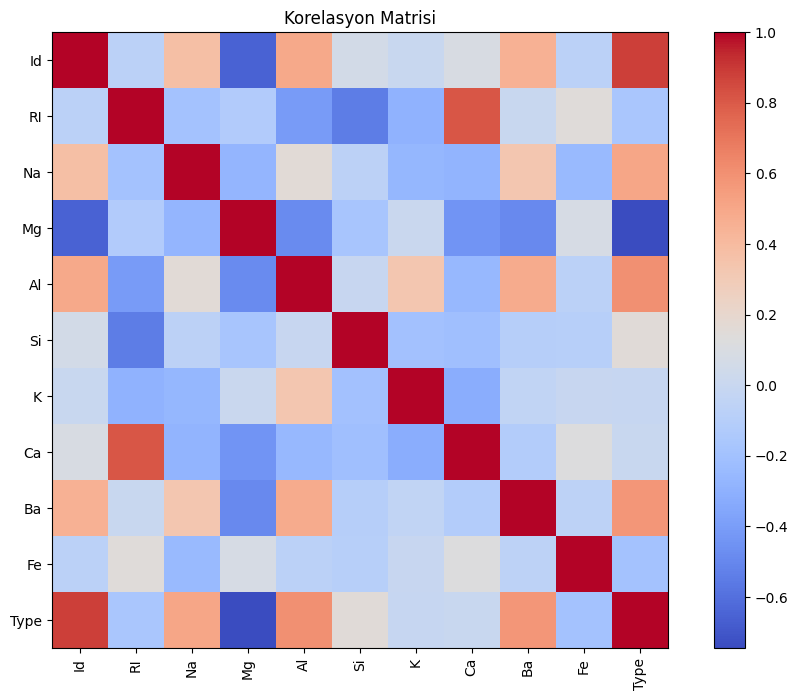

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# İlk birkaç satırın görüntülenmesi
print("Veri Setinin İlk Satırları:")
print(data.head())

# Veri setinin genel bilgileri
print("\nVeri Setinin Genel Bilgileri:")
print(data.info())

# Veri setindeki özet istatistikler
print("\nVeri Setinin Özet İstatistikleri:")
print(data.describe())

# Eksik değerlerin kontrolü
print("\nEksik Değerlerin Kontrolü:")
missing_values = data.isnull().sum()
print(missing_values)

# Sınıf dağılımının incelenmesi
print("\nSınıf Dağılımı:")
class_distribution = data['Type'].value_counts()
print(class_distribution)

# Özelliklerin histogram grafikleri
print("\nÖzelliklerin Histogram Grafikleri:")
data.hist(bins=15, figsize=(15, 10))
plt.show()

# Korelasyon matrisi
print("\nKorelasyon Matrisi:")
correlation_matrix = data.corr()
print(correlation_matrix)

# Korelasyon matrisinin ısı haritası ile görselleştirilmesi
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Korelasyon Matrisi')
plt.show()


Veri Setinin İlk Satırları:
   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Veri Setinin Genel Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      21

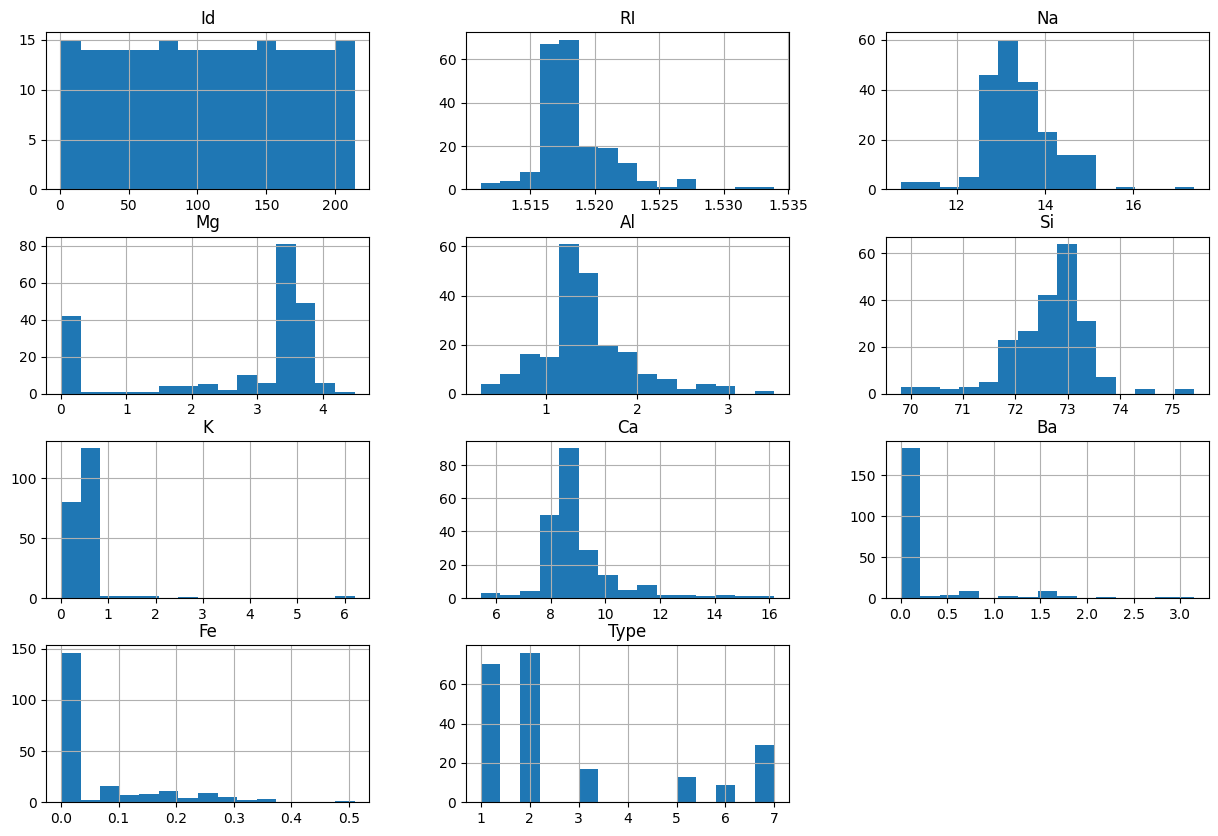


Korelasyon Matrisi:
            Id        RI        Na        Mg        Al        Si         K  \
Id    1.000000 -0.072209  0.375722 -0.650328  0.490113  0.061232  0.003149   
RI   -0.072209  1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833   
Na    0.375722 -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087   
Mg   -0.650328 -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396   
Al    0.490113 -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958   
Si    0.061232 -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331   
K     0.003149 -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000   
Ca    0.090800  0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836   
Ba    0.451001 -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618   
Fe   -0.072794  0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719   
Type  0.877357 -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054   

            Ca        Ba        Fe      Ty

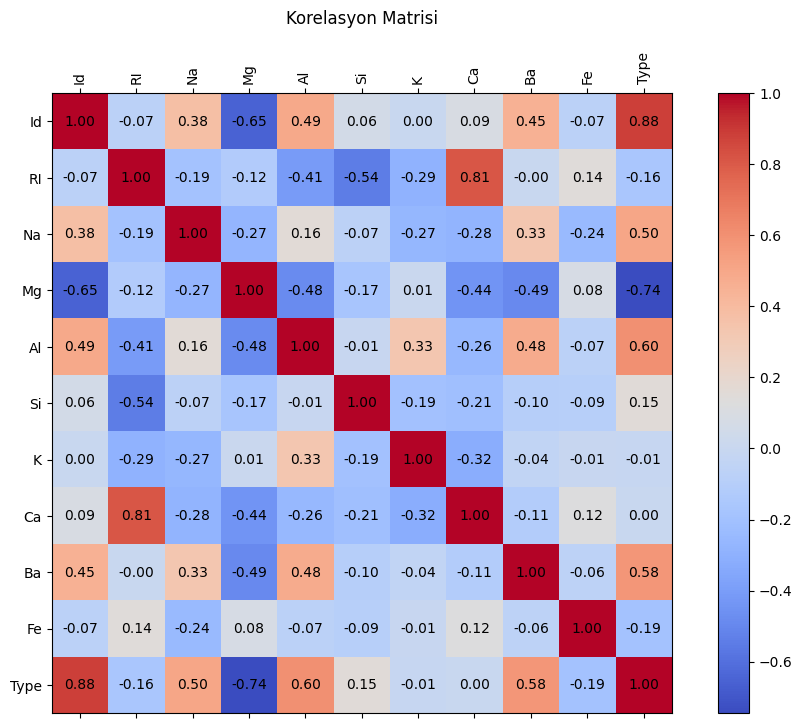

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# İlk birkaç satırın görüntülenmesi
print("Veri Setinin İlk Satırları:")
print(data.head())

# Veri setinin genel bilgileri
print("\nVeri Setinin Genel Bilgileri:")
print(data.info())

# Veri setindeki özet istatistikler
print("\nVeri Setinin Özet İstatistikleri:")
print(data.describe())

# Eksik değerlerin kontrolü
print("\nEksik Değerlerin Kontrolü:")
missing_values = data.isnull().sum()
print(missing_values)

# Sınıf dağılımının incelenmesi
print("\nSınıf Dağılımı:")
class_distribution = data['Type'].value_counts()
print(class_distribution)

# Özelliklerin histogram grafikleri
print("\nÖzelliklerin Histogram Grafikleri:")
data.hist(bins=15, figsize=(15, 10))
plt.show()

# Korelasyon matrisi
print("\nKorelasyon Matrisi:")
correlation_matrix = data.corr()
print(correlation_matrix)

# Korelasyon matrisinin ısı haritası ile görselleştirilmesi (sayılar ile birlikte)
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Matris üzerinde sayıları göstermek
for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.title('Korelasyon Matrisi', pad=20)
plt.show()


Veri Setinin İlk Satırları:
   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Veri Setinin Genel Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      21

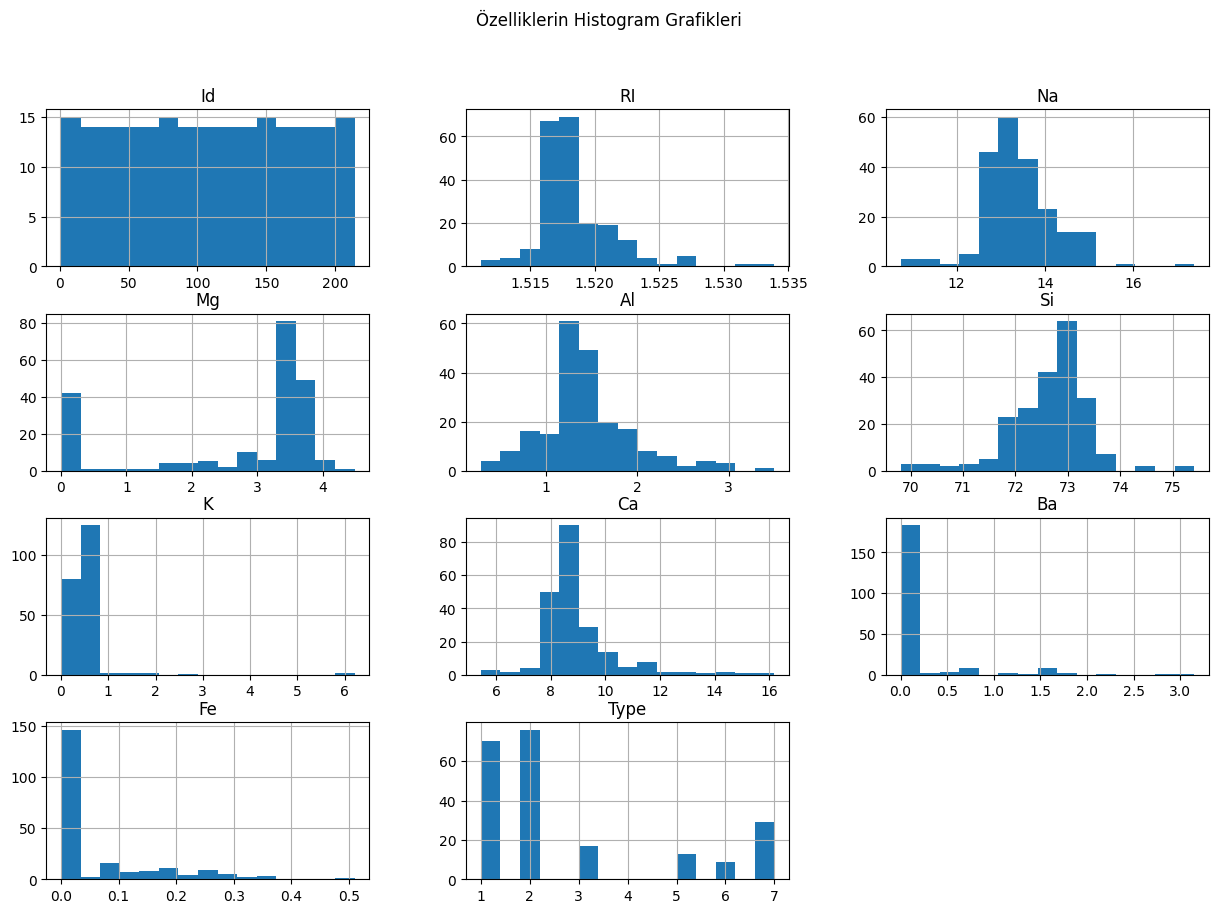


Özellikler Arasındaki İlişkilerin Scatter Plot'ları:


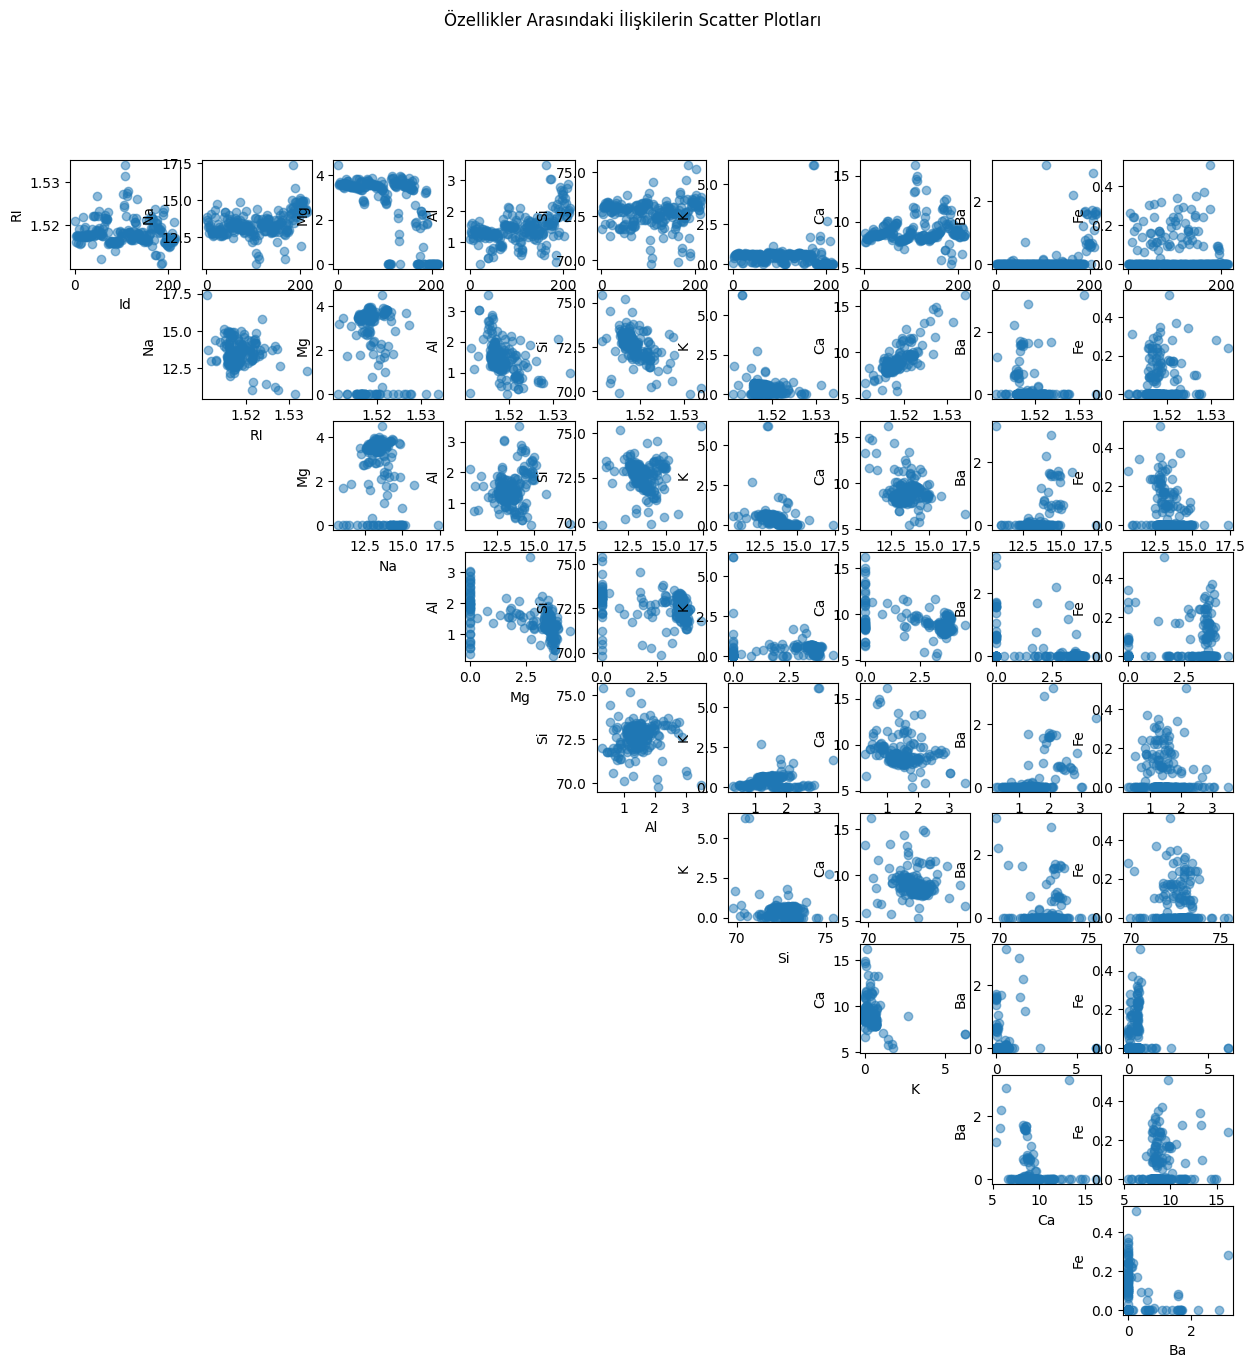


Box Plot'lar ile Aykırı Değerlerin Tespiti:


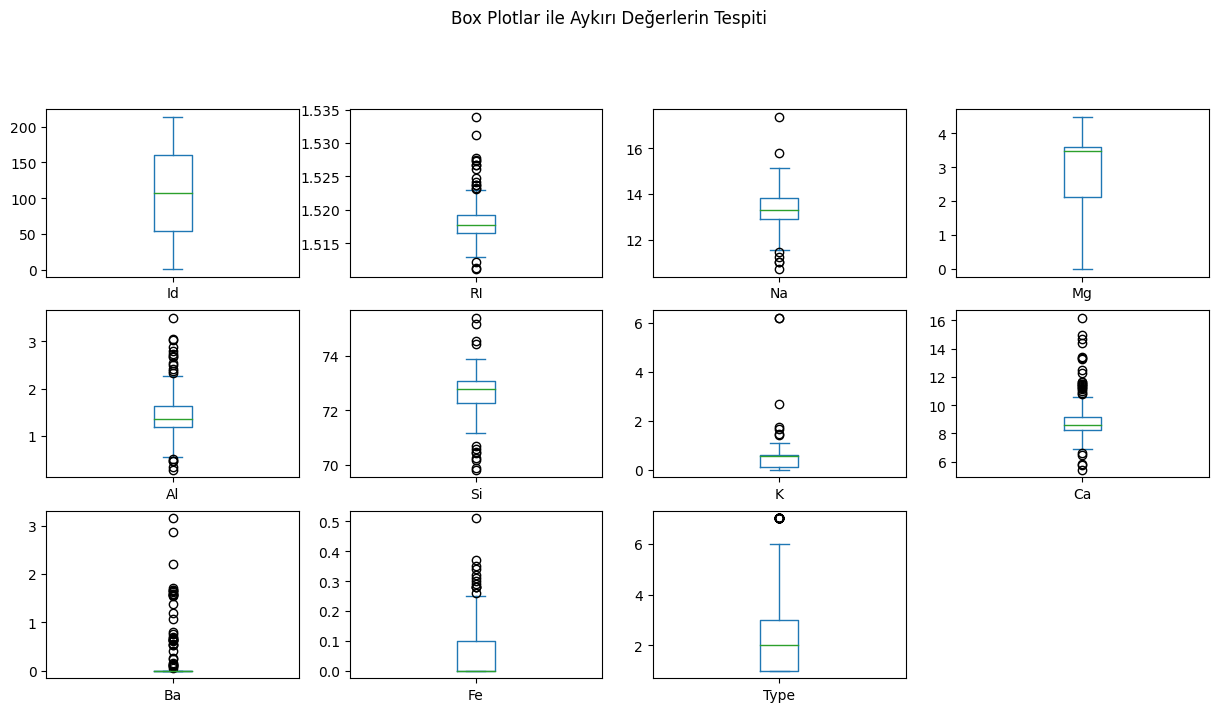

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# İlk birkaç satırın görüntülenmesi
print("Veri Setinin İlk Satırları:")
print(data.head())

# Veri setinin genel bilgileri
print("\nVeri Setinin Genel Bilgileri:")
print(data.info())

# Özelliklerin histogram grafikleri
print("\nÖzelliklerin Histogram Grafikleri:")
data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Özelliklerin Histogram Grafikleri')
plt.show()

# Özellikler arasındaki ilişkilerin scatter plot'ları
print("\nÖzellikler Arasındaki İlişkilerin Scatter Plot'ları:")
features = data.columns[:-1]  # Son sütun sınıf sütunu olduğu için hariç tutuyoruz
plt.figure(figsize=(15, 15))
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plt.subplot(len(features)-1, len(features)-1, i*(len(features)-1) + j)
        plt.scatter(data[features[i]], data[features[j]], alpha=0.5)
        plt.xlabel(features[i])
        plt.ylabel(features[j])
plt.suptitle('Özellikler Arasındaki İlişkilerin Scatter Plotları')
plt.show()

# Box plot'lar ile aykırı değerlerin tespiti
print("\nBox Plot'lar ile Aykırı Değerlerin Tespiti:")
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle('Box Plotlar ile Aykırı Değerlerin Tespiti')
plt.show()


Veri Setinin İlk Satırları:
   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Veri Setinin Genel Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      21

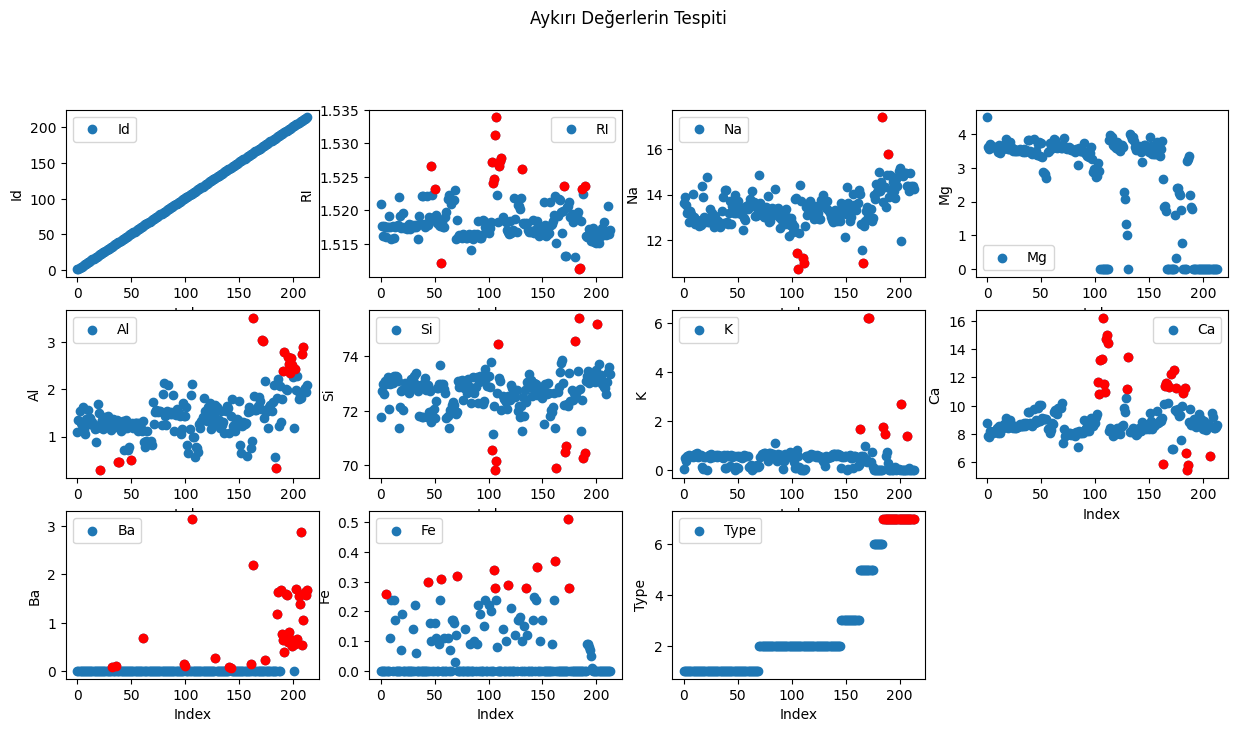


Aykırı Değerlerin Özelliklere Göre Dağılımı:
Id       0
RI      17
Na       7
Mg       0
Al      18
Si      12
K        7
Ca      26
Ba      38
Fe      12
Type    29
dtype: int64


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# İlk birkaç satırın görüntülenmesi
print("Veri Setinin İlk Satırları:")
print(data.head())

# Veri setinin genel bilgileri
print("\nVeri Setinin Genel Bilgileri:")
print(data.info())

# Aykırı değerlerin tespiti için IQR yöntemi
def detect_outliers(df):
    outliers = pd.DataFrame()
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound))
    return outliers

# Aykırı değerlerin tespiti
outliers = detect_outliers(data)

# Aykırı değerlerin görselleştirilmesi
def plot_outliers(df, outliers):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df.columns):
        if df[column].dtype in ['int64', 'float64']:
            plt.subplot(4, 4, i+1)
            plt.scatter(df.index, df[column], label=column)
            plt.scatter(outliers[outliers[column]].index, df[outliers[column]][column], color='red')
            plt.xlabel('Index')
            plt.ylabel(column)
            plt.legend()
    plt.suptitle('Aykırı Değerlerin Tespiti')
    plt.show()

# Aykırı değerlerin görselleştirilmesi
plot_outliers(data, outliers)

# Aykırı değerlerin sayısal olarak gösterimi
outliers_summary = outliers.sum()
print("\nAykırı Değerlerin Özelliklere Göre Dağılımı:")
print(outliers_summary)


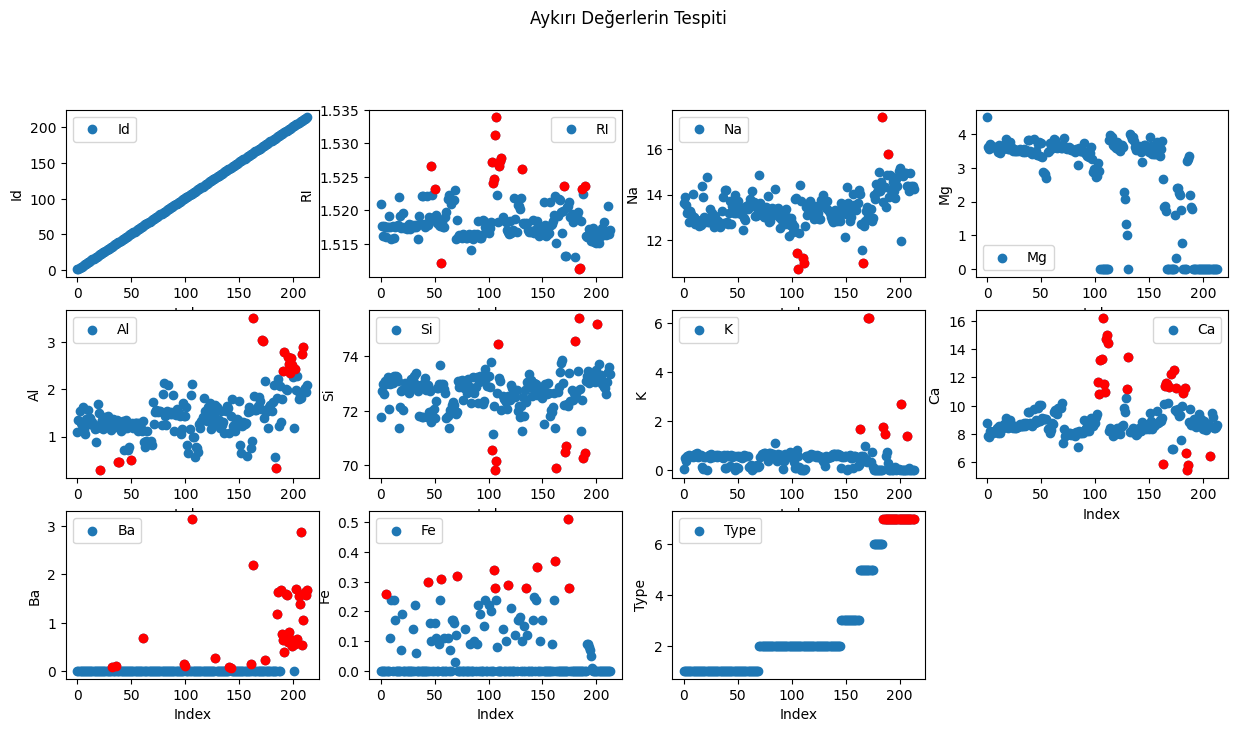

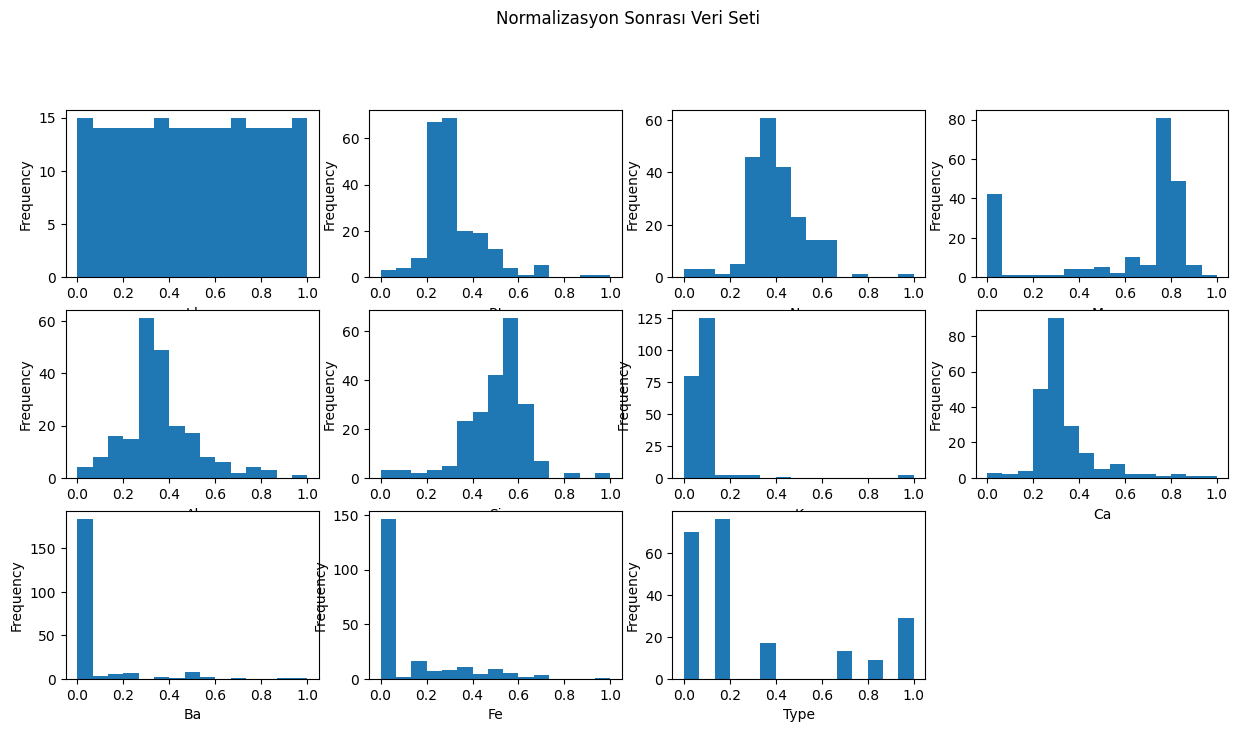


Normalizasyon Sonrası Veri Setinin İlk Satırları:
         Id        RI        Na        Mg        Al        Si         K  \
0  0.000000  0.432836  0.437594  1.000000  0.252336  0.351786  0.009662   
1  0.004695  0.283582  0.475188  0.801782  0.333333  0.521429  0.077295   
2  0.009390  0.220808  0.421053  0.790646  0.389408  0.567857  0.062802   
3  0.014085  0.285777  0.372932  0.821826  0.311526  0.500000  0.091787   
4  0.018779  0.275241  0.381955  0.806236  0.295950  0.583929  0.088567   

         Ca   Ba   Fe  Type  
0  0.308550  0.0  0.0   0.0  
1  0.223048  0.0  0.0   0.0  
2  0.218401  0.0  0.0   0.0  
3  0.259294  0.0  0.0   0.0  
4  0.245353  0.0  0.0   0.0  


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# Aykırı değerlerin tespiti için IQR yöntemi
def detect_outliers(df):
    outliers = pd.DataFrame()
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound))
    return outliers

# Aykırı değerlerin tespiti
outliers = detect_outliers(data)

# Aykırı değerlerin görselleştirilmesi
def plot_outliers(df, outliers):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df.columns):
        if df[column].dtype in ['int64', 'float64']:
            plt.subplot(4, 4, i+1)
            plt.scatter(df.index, df[column], label=column)
            plt.scatter(outliers[outliers[column]].index, df[outliers[column]][column], color='red')
            plt.xlabel('Index')
            plt.ylabel(column)
            plt.legend()
    plt.suptitle('Aykırı Değerlerin Tespiti')
    plt.show()

# Aykırı değerlerin görselleştirilmesi
plot_outliers(data, outliers)

# Min-Max Scaling ile normalizasyon
scaler = MinMaxScaler()

# Sadece sayısal özelliklerin seçilmesi
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Normalizasyon sonrası veri setinin görselleştirilmesi
def plot_normalized_data(df):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df.columns):
        if df[column].dtype in ['int64', 'float64']:
            plt.subplot(4, 4, i+1)
            plt.hist(df[column], bins=15)
            plt.xlabel(column)
            plt.ylabel('Frequency')
    plt.suptitle('Normalizasyon Sonrası Veri Seti')
    plt.show()

plot_normalized_data(data)

# Normalizasyon sonrası veri setinin ilk birkaç satırı
print("\nNormalizasyon Sonrası Veri Setinin İlk Satırları:")
print(data.head())


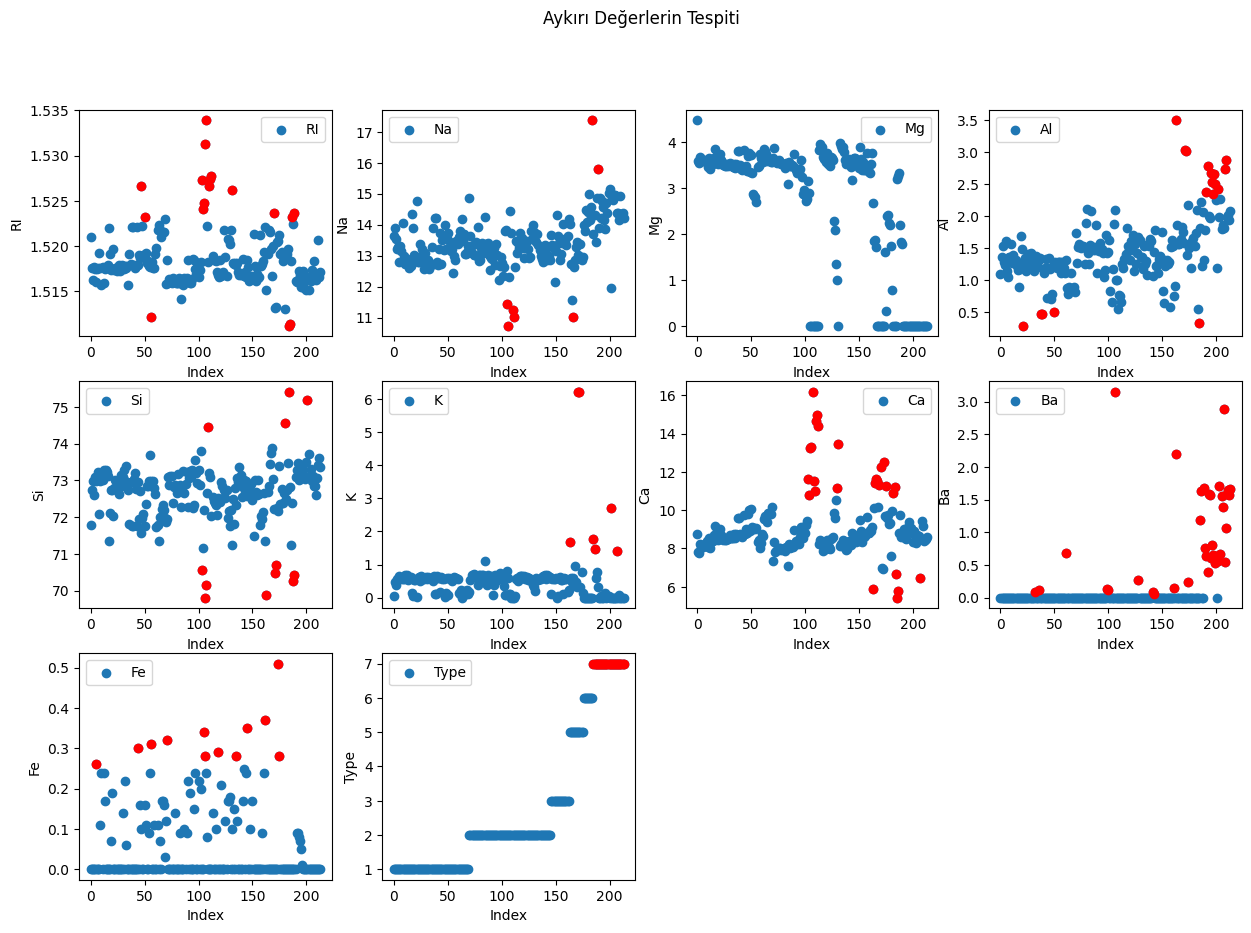

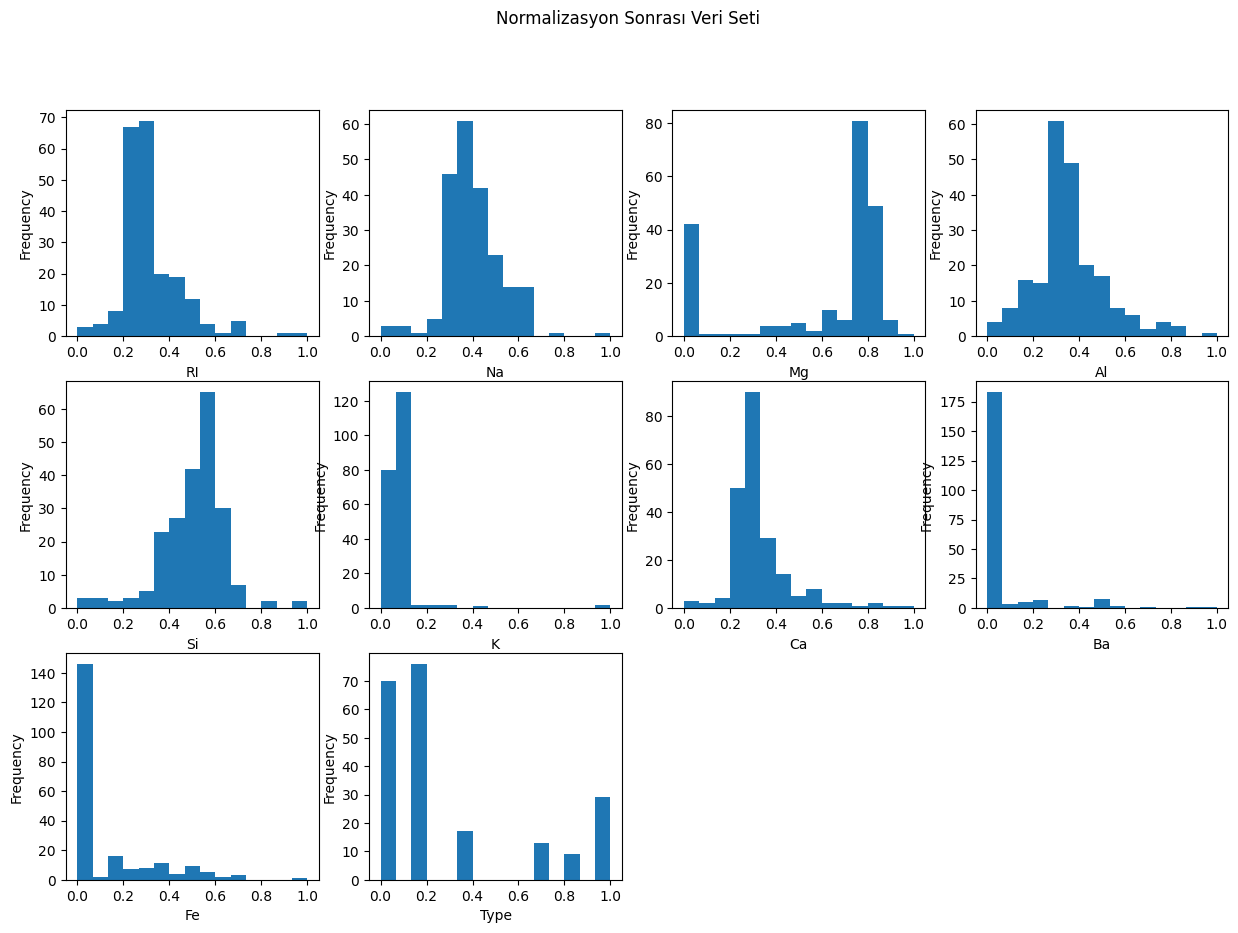


Normalizasyon Sonrası Veri Setinin İlk Satırları:
         RI        Na        Mg        Al        Si         K        Ca   Ba  \
0  0.432836  0.437594  1.000000  0.252336  0.351786  0.009662  0.308550  0.0   
1  0.283582  0.475188  0.801782  0.333333  0.521429  0.077295  0.223048  0.0   
2  0.220808  0.421053  0.790646  0.389408  0.567857  0.062802  0.218401  0.0   
3  0.285777  0.372932  0.821826  0.311526  0.500000  0.091787  0.259294  0.0   
4  0.275241  0.381955  0.806236  0.295950  0.583929  0.088567  0.245353  0.0   

    Fe  Type  
0  0.0   0.0  
1  0.0   0.0  
2  0.0   0.0  
3  0.0   0.0  
4  0.0   0.0  


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Aykırı değerlerin tespiti için IQR yöntemi
def detect_outliers(df):
    outliers = pd.DataFrame()
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound))
    return outliers

# Aykırı değerlerin tespiti
outliers = detect_outliers(data)

# Aykırı değerlerin görselleştirilmesi
def plot_outliers(df, outliers):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df.columns):
        if df[column].dtype in ['int64', 'float64']:
            plt.subplot(3, 4, i+1)
            plt.scatter(df.index, df[column], label=column)
            plt.scatter(outliers[outliers[column]].index, df[outliers[column]][column], color='red')
            plt.xlabel('Index')
            plt.ylabel(column)
            plt.legend()
    plt.suptitle('Aykırı Değerlerin Tespiti')
    plt.show()

# Aykırı değerlerin görselleştirilmesi
plot_outliers(data, outliers)

# Min-Max Scaling ile normalizasyon
scaler = MinMaxScaler()

# Sadece sayısal özelliklerin seçilmesi
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Normalizasyon sonrası veri setinin görselleştirilmesi
def plot_normalized_data(df):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df.columns):
        if df[column].dtype in ['int64', 'float64']:
            plt.subplot(3, 4, i+1)
            plt.hist(df[column], bins=15)
            plt.xlabel(column)
            plt.ylabel('Frequency')
    plt.suptitle('Normalizasyon Sonrası Veri Seti')
    plt.show()

plot_normalized_data(data)

# Normalizasyon sonrası veri setinin ilk birkaç satırı
print("\nNormalizasyon Sonrası Veri Setinin İlk Satırları:")
print(data.head())


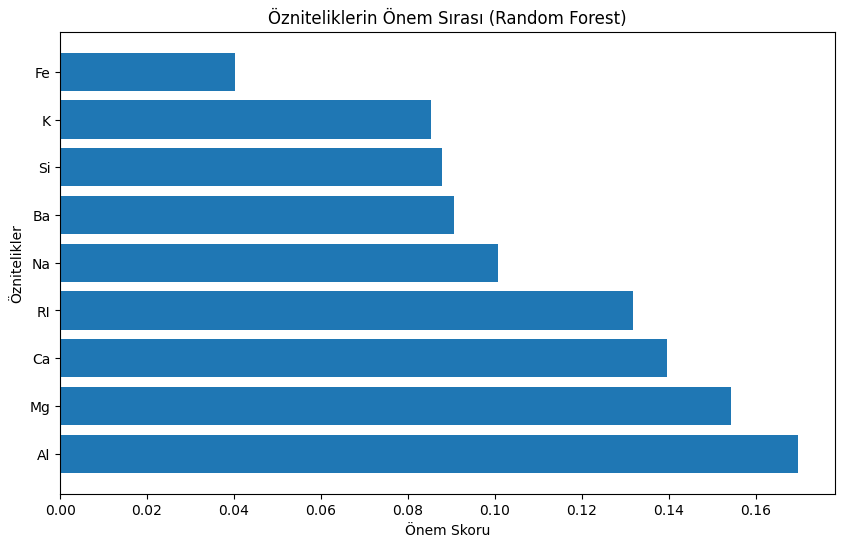

Seçilen En Önemli Öznitelikler: ['Al', 'Mg', 'Ca', 'RI', 'Na']


In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Özellikler (X) ve hedef değişkenin (y) ayrılması
X = data.drop(columns=['Type'])
y = data['Type']

# Random Forest Classifier modelini oluşturma ve eğitme
model = RandomForestClassifier()
model.fit(X, y)

# Özniteliklerin önemini alma
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Özniteliklerin önem sırasının görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.title("Özniteliklerin Önem Sırası (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Önem Skoru")
plt.ylabel("Öznitelikler")
plt.show()

# En önemli öznitelikleri seçme
num_top_features = 5  # En önemli 5 özniteliği seçelim
top_features = [X.columns[i] for i in indices[:num_top_features]]
print("Seçilen En Önemli Öznitelikler:", top_features)


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Özellikler (X) ve hedef değişkenin (y) ayrılması
X = data.drop(columns=['Type'])
y = data['Type']

# Random Forest Classifier modelini oluşturma ve eğitme
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# En önemli öznitelikleri seçme
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
num_top_features = 5  # En önemli 5 özniteliği seçelim
top_features = [X.columns[i] for i in indices[:num_top_features]]
print("Seçilen En Önemli Öznitelikler:", top_features)

# Seçilen özniteliklerle veri setini yeniden oluşturma
X_top = data[top_features]

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

# KNN modelini oluşturma ve eğitme
knn = KNeighborsClassifier(n_neighbors=5)  # K değeri 5 olarak seçildi
knn.fit(X_train, y_train)

# Test seti ile tahmin yapma
y_pred = knn.predict(X_test)

# Modelin doğruluğunu değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("KNN Modeli Doğruluğu:", accuracy)


Seçilen En Önemli Öznitelikler: ['Mg', 'Al', 'RI', 'Ca', 'Ba']
KNN Modeli Doğruluğu: 0.6307692307692307


Seçilen En Önemli Öznitelikler: ['Al', 'Mg', 'RI', 'Ca', 'Na']
KNN Modeli Doğruluğu: 0.6153846153846154


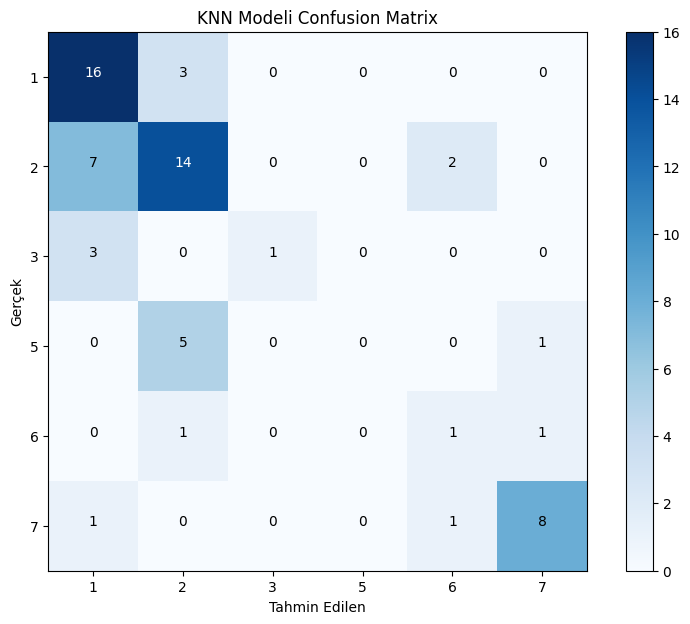

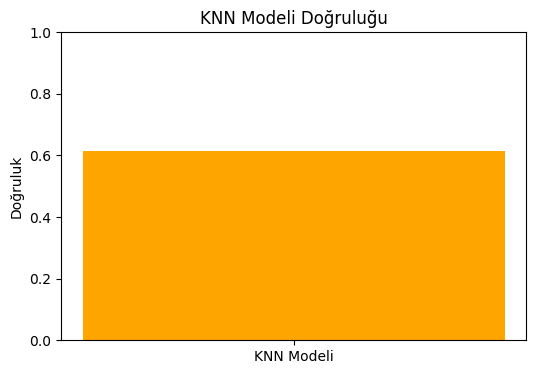

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Özellikler (X) ve hedef değişkenin (y) ayrılması
X = data.drop(columns=['Type'])
y = data['Type']

# Random Forest Classifier modelini oluşturma ve eğitme
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# En önemli öznitelikleri seçme
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
num_top_features = 5  # En önemli 5 özniteliği seçelim
top_features = [X.columns[i] for i in indices[:num_top_features]]
print("Seçilen En Önemli Öznitelikler:", top_features)

# Seçilen özniteliklerle veri setini yeniden oluşturma
X_top = data[top_features]

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

# KNN modelini oluşturma ve eğitme
knn = KNeighborsClassifier(n_neighbors=5)  # K değeri 5 olarak seçildi
knn.fit(X_train, y_train)

# Test seti ile tahmin yapma
y_pred = knn.predict(X_test)

# Modelin doğruluğunu değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("KNN Modeli Doğruluğu:", accuracy)

# Confusion Matrix oluşturma
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix görselleştirilmesi
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('KNN Modeli Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')

# Confusion Matrix hücrelerine değerleri ekleme
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show()

# Doğruluk Değerlerinin Görselleştirilmesi
plt.figure(figsize=(6, 4))
plt.bar(['KNN Modeli'], [accuracy], color='orange')
plt.ylim(0, 1)
plt.ylabel('Doğruluk')
plt.title('KNN Modeli Doğruluğu')
plt.show()


Seçilen En Önemli Öznitelikler: ['Al', 'Mg', 'RI', 'Ca', 'Na']


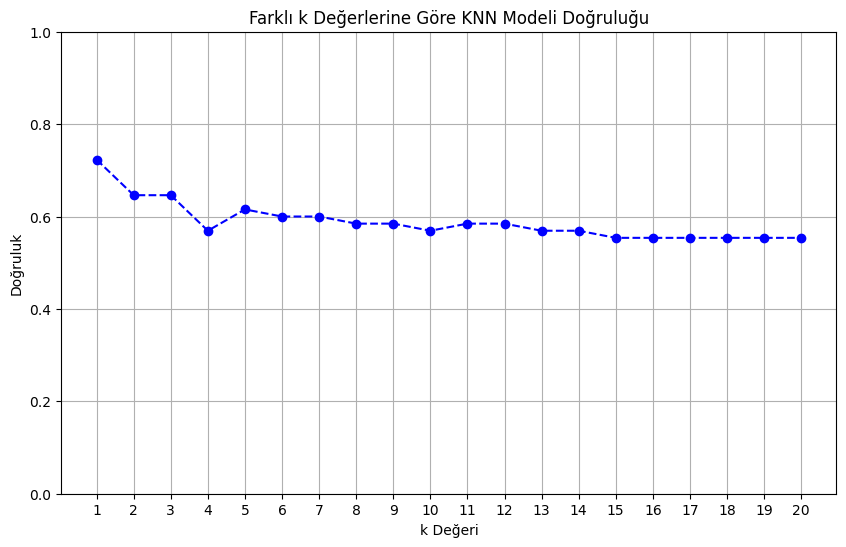

Doğruluk Değerleri (k=3, 5, 7): {3: 0.6461538461538462, 5: 0.6153846153846154, 7: 0.6}


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Özellikler (X) ve hedef değişkenin (y) ayrılması
X = data.drop(columns=['Type'])
y = data['Type']

# Random Forest Classifier modelini oluşturma ve eğitme
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# En önemli öznitelikleri seçme
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
num_top_features = 5  # En önemli 5 özniteliği seçelim
top_features = [X.columns[i] for i in indices[:num_top_features]]
print("Seçilen En Önemli Öznitelikler:", top_features)

# Seçilen özniteliklerle veri setini yeniden oluşturma
X_top = data[top_features]

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

# Farklı k değerleri için KNN modeli oluşturma ve doğruluk değerlerini hesaplama
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Doğruluk değerlerinin görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.xlabel('k Değeri')
plt.ylabel('Doğruluk')
plt.title('Farklı k Değerlerine Göre KNN Modeli Doğruluğu')
plt.ylim(0, 1)  # Y eksenini 0 ile 1 arasında sınırla
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Özellikle k=3, 5 ve 7 için doğruluk değerlerini yazdırma
k_values_specific = [3, 5, 7]
accuracies_specific = {}

for k in k_values_specific:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_specific[k] = accuracy

print("Doğruluk Değerleri (k=3, 5, 7):", accuracies_specific)


Seçilen En Önemli Öznitelikler: ['Mg', 'Al', 'RI', 'Ca', 'Na']
Naive Bayes Modeli Doğruluğu: 0.5384615384615384


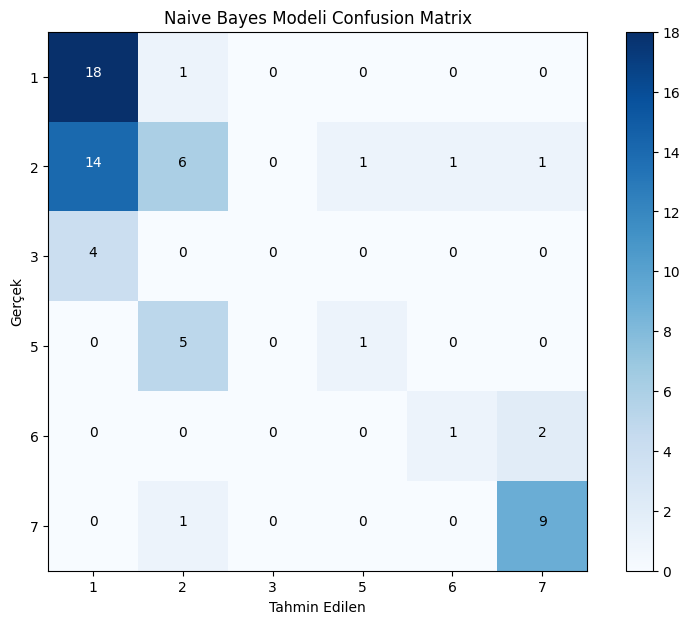

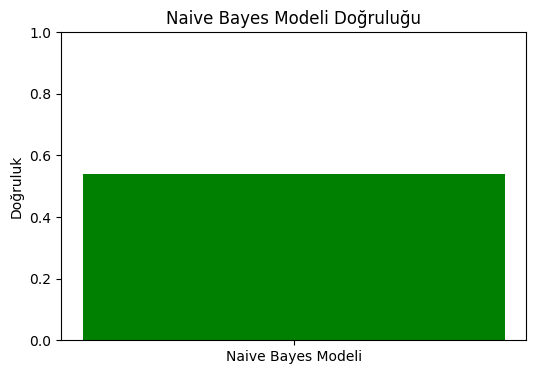

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Özellikler (X) ve hedef değişkenin (y) ayrılması
X = data.drop(columns=['Type'])
y = data['Type']

# Random Forest Classifier modelini oluşturma ve eğitme
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# En önemli öznitelikleri seçme
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
num_top_features = 5  # En önemli 5 özniteliği seçelim
top_features = [X.columns[i] for i in indices[:num_top_features]]
print("Seçilen En Önemli Öznitelikler:", top_features)

# Seçilen özniteliklerle veri setini yeniden oluşturma
X_top = data[top_features]

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

# Naive Bayes modelini oluşturma ve eğitme
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test seti ile tahmin yapma
y_pred = nb_model.predict(X_test)

# Modelin doğruluğunu değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Modeli Doğruluğu:", accuracy)

# Confusion Matrix oluşturma
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix görselleştirilmesi
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Naive Bayes Modeli Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')

# Confusion Matrix hücrelerine değerleri ekleme
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f'{cm[i, j]}', horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show()

# Doğruluk Değerlerinin Görselleştirilmesi
plt.figure(figsize=(6, 4))
plt.bar(['Naive Bayes Modeli'], [accuracy], color='green')
plt.ylim(0, 1)
plt.ylabel('Doğruluk')
plt.title('Naive Bayes Modeli Doğruluğu')
plt.show()


{2: [0.4153846153846154, 0.5846153846153846, 0.6307692307692307, 0.6153846153846154, 0.6615384615384615, 0.6307692307692307, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462], 5: [0.4153846153846154, 0.5846153846153846, 0.6307692307692307, 0.6153846153846154, 0.6615384615384615, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154], 10: [0.4153846153846154, 0.5846153846153846, 0.6307692307692307, 0.6307692307692307, 0.6307692307692307, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6], 20: [0.4

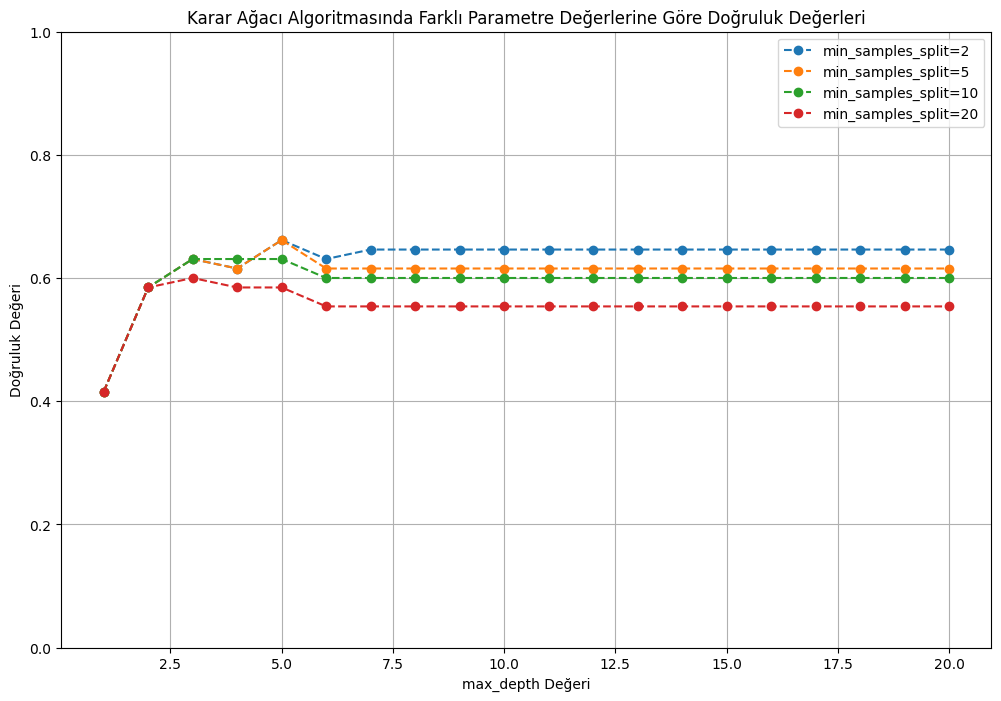

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Özellikler (X) ve hedef değişkenin (y) ayrılması
X = data.drop(columns=['Type'])
y = data['Type']

# En önemli öznitelikleri seçme (Daha önce belirlenen)
top_features = ['RI', 'Na', 'Mg', 'Al', 'Si']

# Seçilen özniteliklerle veri setini yeniden oluşturma
X_top = data[top_features]

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

# Parametre değerlerini belirleme
max_depths = range(1, 21)
min_samples_splits = [2, 5, 10, 20]
accuracies = {split: [] for split in min_samples_splits}

# Karar ağacı modeli ile eğitim ve doğruluk değerlerini hesaplama
for split in min_samples_splits:
    for depth in max_depths:
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, random_state=42)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[split].append(accuracy)

# Hesaplanan doğruluk değerlerini kontrol etme
print(accuracies)

# Doğruluk değerlerinin görselleştirilmesi
plt.figure(figsize=(12, 8))
for split in min_samples_splits:
    plt.plot(max_depths, accuracies[split], marker='o', linestyle='--', label=f'min_samples_split={split}')

plt.xlabel('max_depth Değeri')
plt.ylabel('Doğruluk Değeri')
plt.title('Karar Ağacı Algoritmasında Farklı Parametre Değerlerine Göre Doğruluk Değerleri')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Y eksenini 0 ile 1 arasında sınırla
plt.show()


{2: [0.4153846153846154, 0.5846153846153846, 0.6307692307692307, 0.6153846153846154, 0.6615384615384615, 0.6307692307692307, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462, 0.6461538461538462], 5: [0.4153846153846154, 0.5846153846153846, 0.6307692307692307, 0.6153846153846154, 0.6615384615384615, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154], 10: [0.4153846153846154, 0.5846153846153846, 0.6307692307692307, 0.6307692307692307, 0.6307692307692307, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6], 20: [0.4

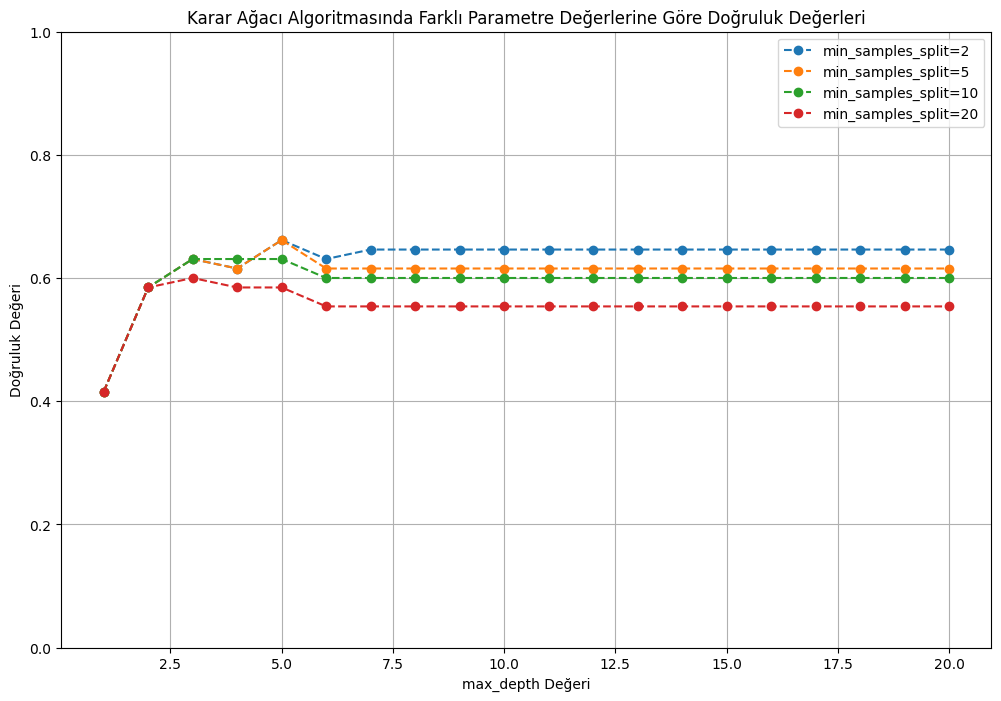

Karar Ağacı Modelinin En Yüksek Doğruluğu: 0.6615384615384615


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Özellikler (X) ve hedef değişkenin (y) ayrılması
X = data.drop(columns=['Type'])
y = data['Type']

# En önemli öznitelikleri seçme (Daha önce belirlenen)
top_features = ['RI', 'Na', 'Mg', 'Al', 'Si']

# Seçilen özniteliklerle veri setini yeniden oluşturma
X_top = data[top_features]

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

# Parametre değerlerini belirleme
max_depths = range(1, 21)
min_samples_splits = [2, 5, 10, 20]
accuracies = {split: [] for split in min_samples_splits}

# Karar ağacı modeli ile eğitim ve doğruluk değerlerini hesaplama
for split in min_samples_splits:
    for depth in max_depths:
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, random_state=42)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[split].append(accuracy)

# Hesaplanan doğruluk değerlerini kontrol etme
print(accuracies)

# Doğruluk değerlerinin görselleştirilmesi
plt.figure(figsize=(12, 8))
for split in min_samples_splits:
    plt.plot(max_depths, accuracies[split], marker='o', linestyle='--', label=f'min_samples_split={split}')

plt.xlabel('max_depth Değeri')
plt.ylabel('Doğruluk Değeri')
plt.title('Karar Ağacı Algoritmasında Farklı Parametre Değerlerine Göre Doğruluk Değerleri')
plt.legend()
plt.grid(True)
plt.ylim(0.0, 1.0)  # Y eksenini 0 ile 1 arasında sınırla
plt.show()

# En yüksek doğruluk değerini belirleme
max_accuracy = max([max(acc) for acc in accuracies.values()])
print(f"Karar Ağacı Modelinin En Yüksek Doğruluğu: {max_accuracy}")


Karar Ağacı Modeli Doğruluğu: 0.6461538461538462


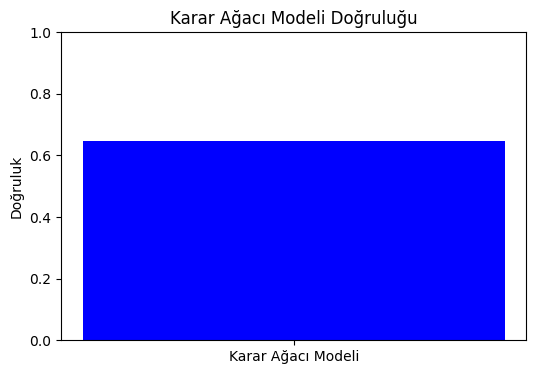

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Özellikler (X) ve hedef değişkenin (y) ayrılması
X = data.drop(columns=['Type'])
y = data['Type']

# En önemli öznitelikleri seçme
top_features = ['RI', 'Na', 'Mg', 'Al', 'Si']

# Seçilen özniteliklerle veri setini yeniden oluşturma
X_top = data[top_features]

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

# Karar ağacı modelini oluşturma ve eğitme
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Test seti ile tahmin yapma
y_pred = tree.predict(X_test)

# Modelin doğruluğunu değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("Karar Ağacı Modeli Doğruluğu:", accuracy)

# Doğruluk Değerlerinin Görselleştirilmesi
plt.figure(figsize=(6, 4))
plt.bar(['Karar Ağacı Modeli'], [accuracy], color='blue')
plt.ylim(0, 1)
plt.ylabel('Doğruluk')
plt.title('Karar Ağacı Modeli Doğruluğu')
plt.show()


Random Forest Modeli Doğruluğu: 0.7846153846153846


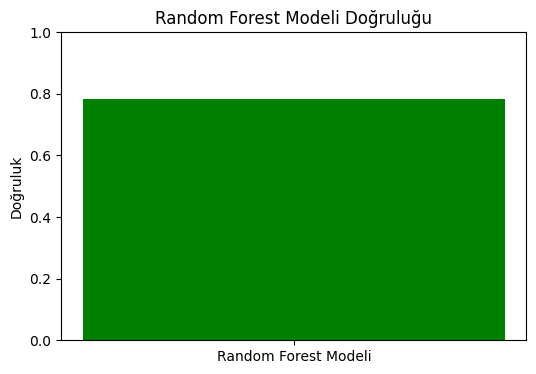

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Özellikler (X) ve hedef değişkenin (y) ayrılması
X = data.drop(columns=['Type'])
y = data['Type']

# En önemli öznitelikleri seçme (Daha önce belirlenen)
top_features = ['RI', 'Na', 'Mg', 'Al', 'Si']

# Seçilen özniteliklerle veri setini yeniden oluşturma
X_top = data[top_features]

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

# Random Forest modelini oluşturma ve eğitme
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Test seti ile tahmin yapma
y_pred = rf_model.predict(X_test)

# Modelin doğruluğunu değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Modeli Doğruluğu:", accuracy)

# Doğruluk Değerlerinin Görselleştirilmesi
plt.figure(figsize=(6, 4))
plt.bar(['Random Forest Modeli'], [accuracy], color='green')
plt.ylim(0, 1)
plt.ylabel('Doğruluk')
plt.title('Random Forest Modeli Doğruluğu')
plt.show()


Logistic Regression Modeli Doğruluğu: 0.6461538461538462


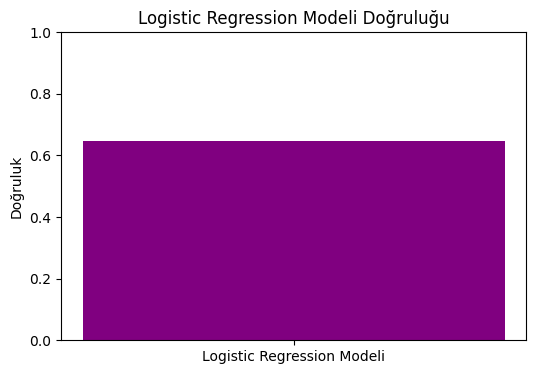

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Özellikler (X) ve hedef değişkenin (y) ayrılması
X = data.drop(columns=['Type'])
y = data['Type']

# En önemli öznitelikleri seçme (Daha önce belirlenen)
top_features = ['RI', 'Na', 'Mg', 'Al', 'Si']

# Seçilen özniteliklerle veri setini yeniden oluşturma
X_top = data[top_features]

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

# Logistic Regression modelini oluşturma ve eğitme
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

# Test seti ile tahmin yapma
y_pred = log_reg.predict(X_test)

# Modelin doğruluğunu değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Modeli Doğruluğu:", accuracy)

# Doğruluk Değerlerinin Görselleştirilmesi
plt.figure(figsize=(6, 4))
plt.bar(['Logistic Regression Modeli'], [accuracy], color='purple')
plt.ylim(0, 1)
plt.ylabel('Doğruluk')
plt.title('Logistic Regression Modeli Doğruluğu')
plt.show()


/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Yapay Sinir Ağları Modeli Doğruluğu: 0.6461538461538462


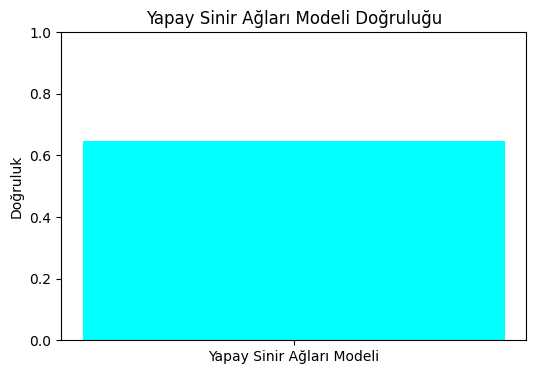

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Özellikler (X) ve hedef değişkenin (y) ayrılması
X = data.drop(columns=['Type'])
y = data['Type']

# En önemli öznitelikleri seçme (Daha önce belirlenen)
top_features = ['RI', 'Na', 'Mg', 'Al', 'Si']

# Seçilen özniteliklerle veri setini yeniden oluşturma
X_top = data[top_features]

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

# Yapay sinir ağları modelini oluşturma ve eğitme
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Test seti ile tahmin yapma
y_pred = mlp.predict(X_test)

# Modelin doğruluğunu değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("Yapay Sinir Ağları Modeli Doğruluğu:", accuracy)

# Doğruluk Değerlerinin Görselleştirilmesi
plt.figure(figsize=(6, 4))
plt.bar(['Yapay Sinir Ağları Modeli'], [accuracy], color='cyan')
plt.ylim(0, 1)
plt.ylabel('Doğruluk')
plt.title('Yapay Sinir Ağları Modeli Doğruluğu')
plt.show()


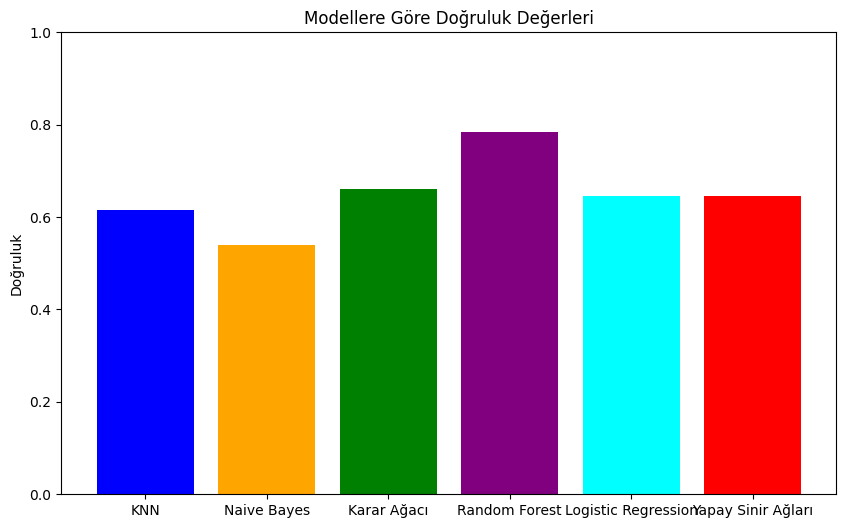

KNN Modeli Doğruluğu: 0.6154
Naive Bayes Modeli Doğruluğu: 0.5385
Karar Ağacı Modeli Doğruluğu: 0.6615
Random Forest Modeli Doğruluğu: 0.7846
Logistic Regression Modeli Doğruluğu: 0.6462
Yapay Sinir Ağları Modeli Doğruluğu: 0.6462


In [36]:
import matplotlib.pyplot as plt

# Modeller ve doğruluk değerleri
models = ['KNN', 'Naive Bayes', 'Karar Ağacı', 'Random Forest', 'Logistic Regression', 'Yapay Sinir Ağları']
accuracies = [0.6154, 0.5385, 0.6615, 0.7846, 0.6462, 0.6462]

# Doğruluk Değerlerinin Görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'purple', 'cyan', 'red'])
plt.ylim(0, 1)
plt.ylabel('Doğruluk')
plt.title('Modellere Göre Doğruluk Değerleri')
plt.show()

# Doğruluk değerlerinin yazdırılması
for model, accuracy in zip(models, accuracies):
    print(f"{model} Modeli Doğruluğu: {accuracy:.4f}")


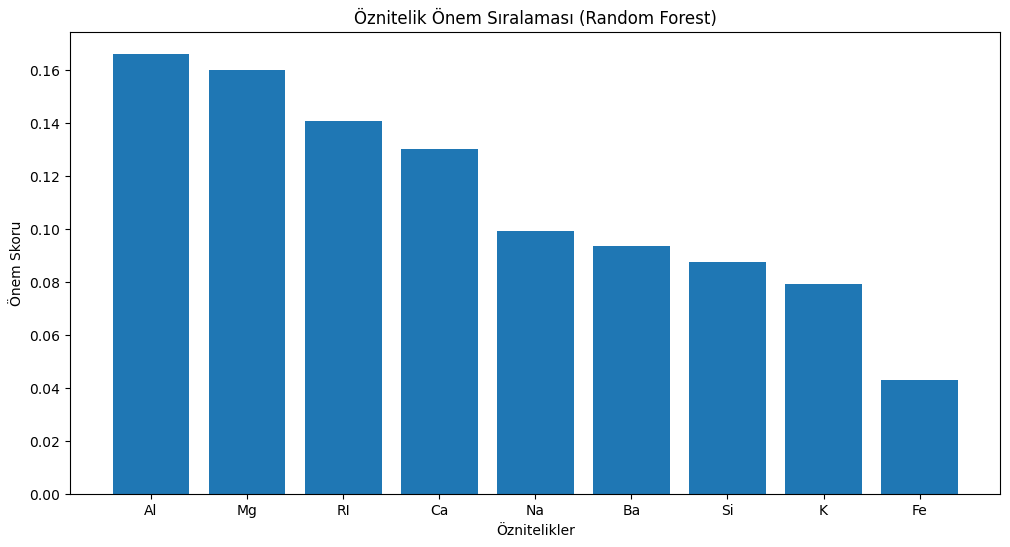

En belirleyici öznitelik: Al


In [37]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Özellikler (X) ve hedef değişkenin (y) ayrılması
X = data.drop(columns=['Type'])
y = data['Type']

# Random Forest modelini oluşturma ve eğitme
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Özniteliklerin önem sıralamasını alma
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Özniteliklerin önem sıralamasını görselleştirme
plt.figure(figsize=(12, 6))
plt.title('Öznitelik Önem Sıralaması (Random Forest)')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel('Öznitelikler')
plt.ylabel('Önem Skoru')
plt.show()

# En önemli öznitelik
most_important_feature = X.columns[indices[0]]
print(f"En belirleyici öznitelik: {most_important_feature}")


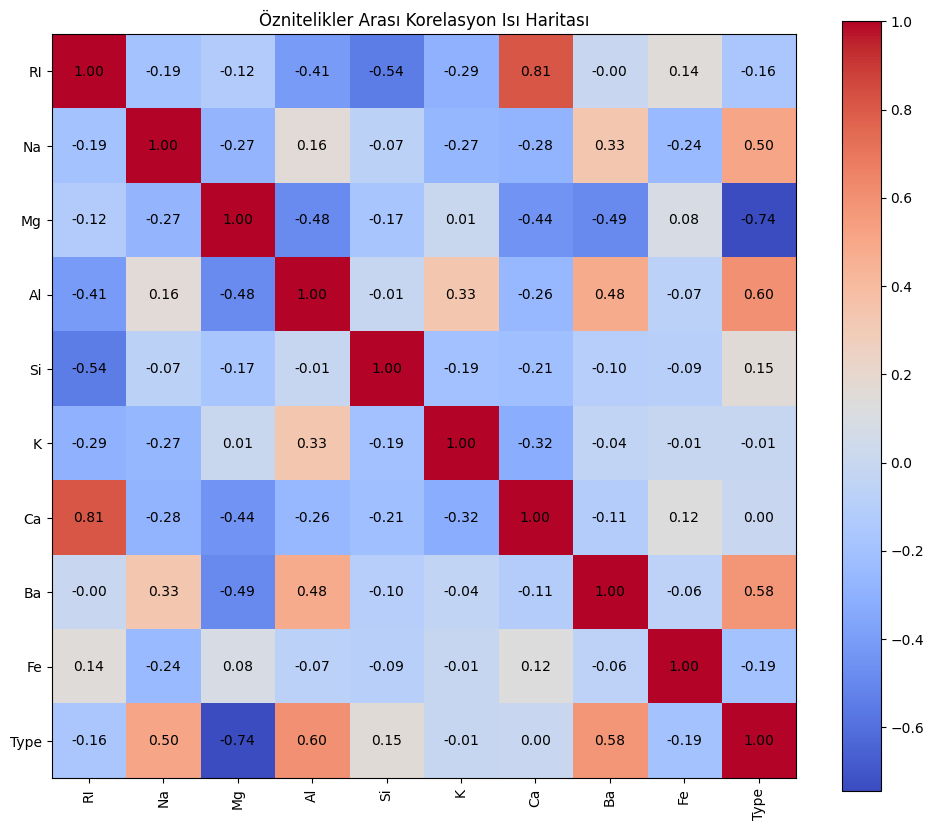

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Isı haritası için korelasyon matrisinin oluşturulması
correlation_matrix = data.corr()

# Isı haritasının görselleştirilmesi
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Öznitelikler Arası Korelasyon Isı Haritası')

# Her hücreye değerini yazdırma
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()


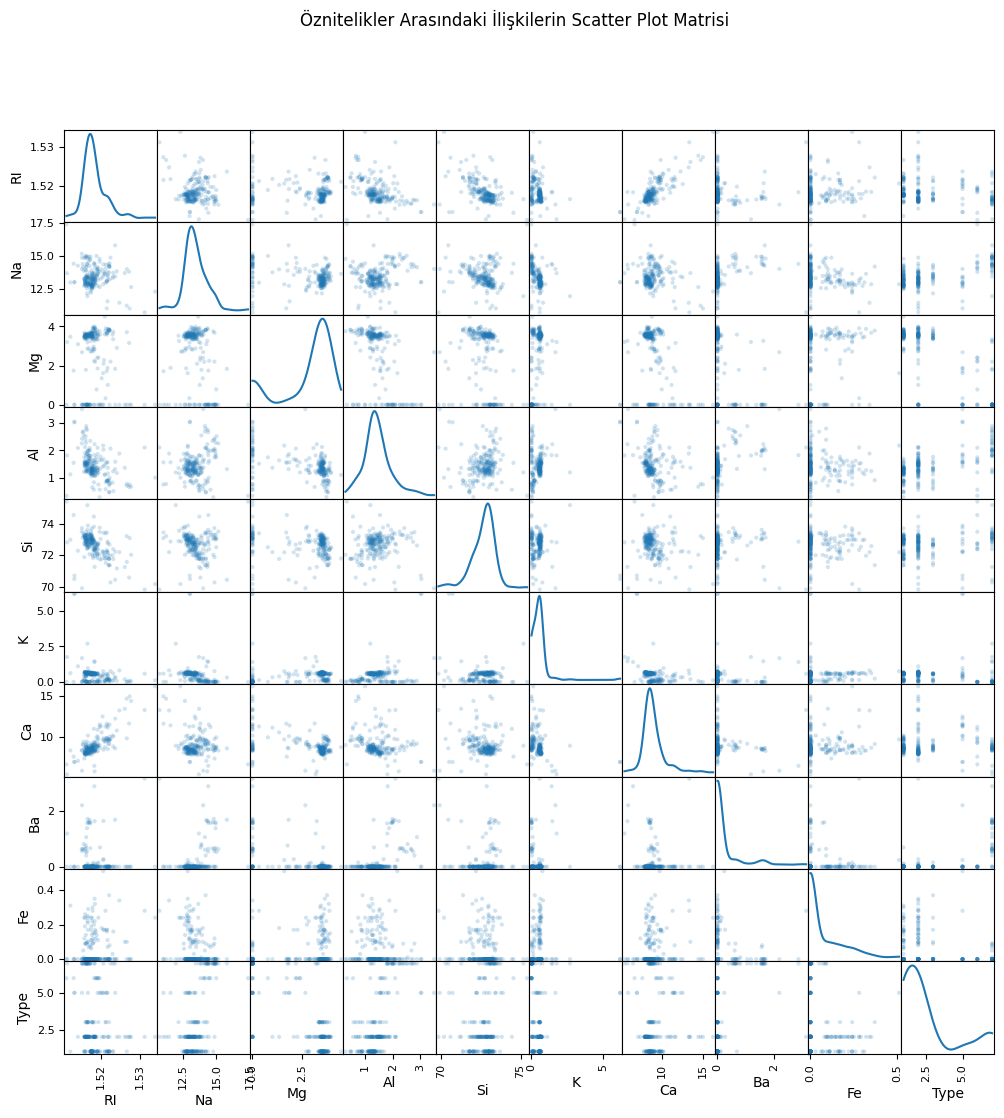

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Scatter plot matrisi oluşturma
scatter_matrix(data, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.suptitle('Öznitelikler Arasındaki İlişkilerin Scatter Plot Matrisi')
plt.show()


<Figure size 1200x1000 with 0 Axes>

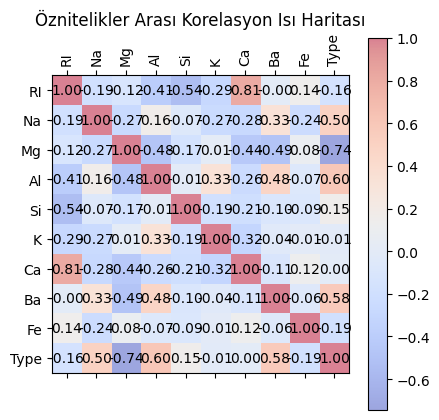

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Korelasyon matrisinin oluşturulması
correlation_matrix = data.corr()

# Isı haritasının oluşturulması
plt.figure(figsize=(12, 10))
cax = plt.matshow(correlation_matrix, cmap='coolwarm', alpha=0.5)
plt.colorbar(cax)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Korelasyon değerlerinin hücrelerde gösterilmesi
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(x=j, y=i, s=f'{correlation_matrix.iloc[i, j]:.2f}', va='center', ha='center', color='black')

plt.title('Öznitelikler Arası Korelasyon Isı Haritası')
plt.show()


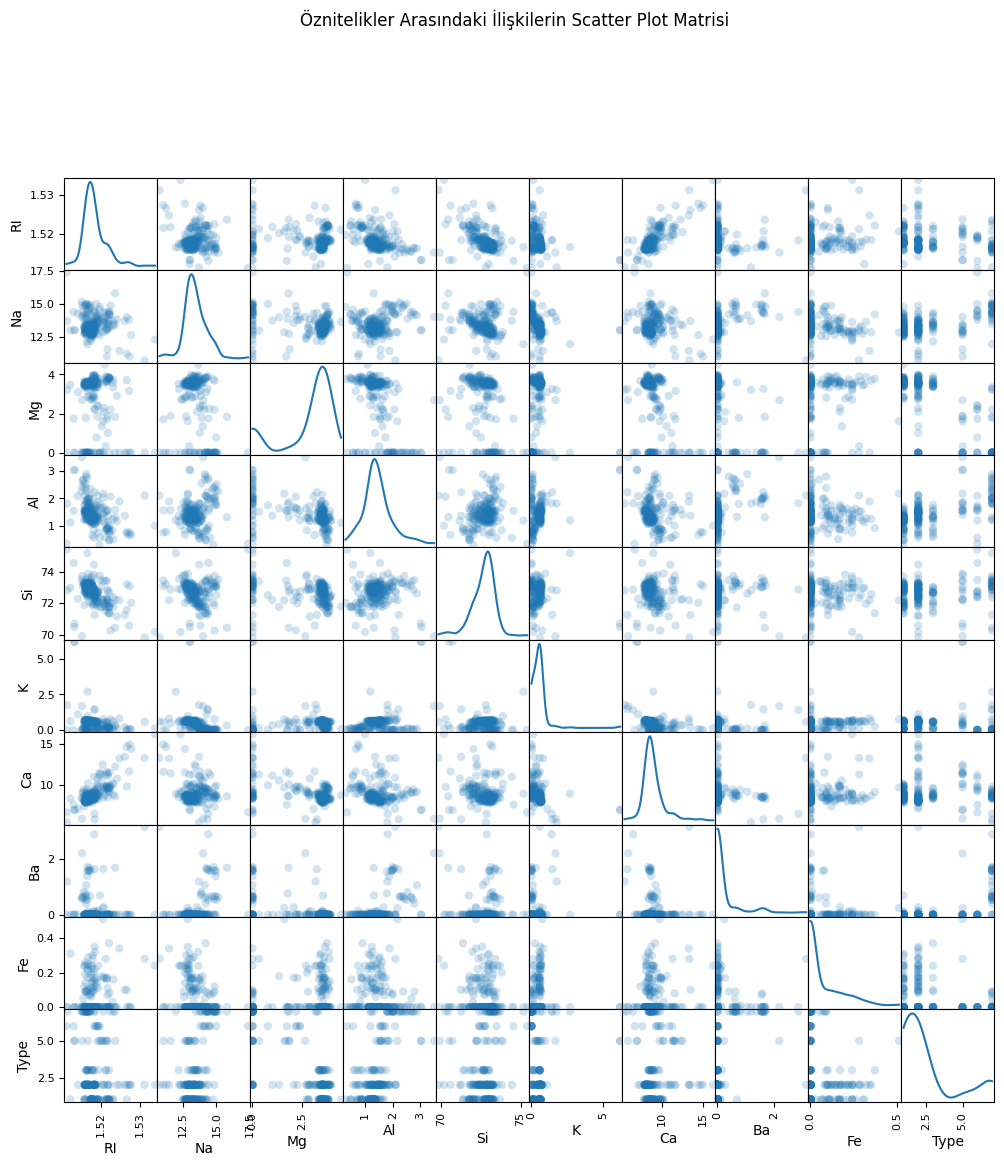

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])

# Scatter plot matrisi oluşturma
scatter_matrix(data, alpha=0.2, figsize=(12, 12), diagonal='kde', marker='o')
plt.suptitle('Öznitelikler Arasındaki İlişkilerin Scatter Plot Matrisi', y=1.02)
plt.show()


In [51]:
import pandas as pd
import numpy as np

# Veri setinin okunması
file_path = 'glass_identification.csv'
data = pd.read_csv(file_path)

# ID sütununun çıkarılması
data = data.drop(columns=['Id'])


In [52]:
# Aykırı değerlerin tespiti için IQR yöntemini kullanma
def detect_outliers(data):
    outliers = {}
    for column in data.columns:
        if data[column].dtype in ['int64', 'float64']:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
            outliers_in_column = data[column][outlier_mask]
            if not outliers_in_column.empty:
                outliers[column] = outliers_in_column
    return outliers

# Aykırı değerlerin tespiti
outliers = detect_outliers(data)

# Aykırı değerleri gösterme
for column, values in outliers.items():
    print(f"Aykırı Değerler - {column} Sütunu:")
    print(values)
    print("\n")


Aykırı Değerler - RI Sütunu:
47     1.52667
50     1.52320
56     1.51215
103    1.52725
104    1.52410
105    1.52475
106    1.53125
107    1.53393
110    1.52664
111    1.52739
112    1.52777
131    1.52614
170    1.52369
184    1.51115
185    1.51131
187    1.52315
189    1.52365
Name: RI, dtype: float64


Aykırı Değerler - Na Sütunu:
105    11.45
106    10.73
110    11.23
111    11.02
166    11.03
184    17.38
189    15.79
Name: Na, dtype: float64


Aykırı Değerler - Al Sütunu:
21     0.29
38     0.47
39     0.47
50     0.51
163    3.50
171    3.04
172    3.02
184    0.34
191    2.38
192    2.79
195    2.68
196    2.54
197    2.34
198    2.66
199    2.51
202    2.42
208    2.74
209    2.88
Name: Al, dtype: float64


Aykırı Değerler - Si Sütunu:
103    70.57
106    69.81
107    70.16
109    74.45
163    69.89
171    70.48
172    70.70
180    74.55
184    75.41
188    70.26
189    70.43
201    75.18
Name: Si, dtype: float64


Aykırı Değerler - K Sütunu:
163    1.68
171    6.21
172   

In [53]:
# Aykırı değerlerin CSV dosyasına yazılması
outliers_df = pd.DataFrame(outliers)
outliers_df.to_csv('outliers.csv', index=False)


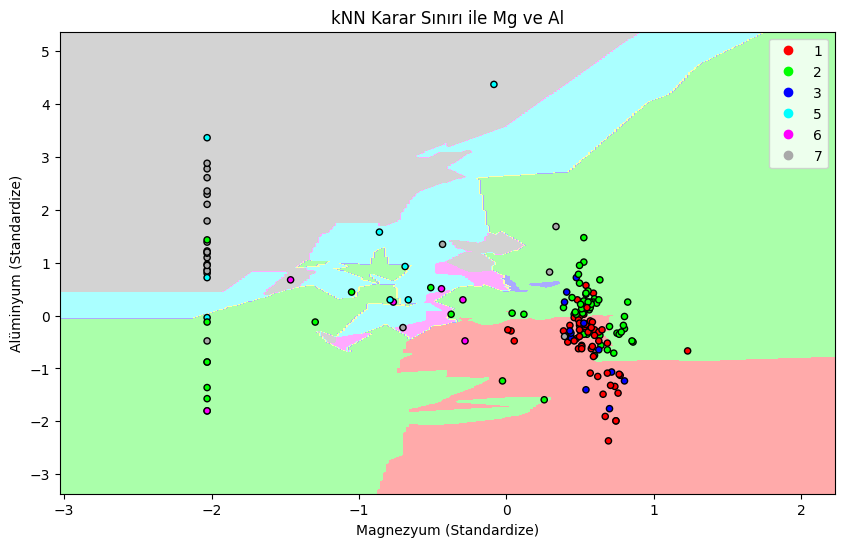

kNN Doğruluk Oranı: 69.77%


In [54]:
# Gerekli kütüphaneleri yükleme
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
import numpy as np

# Veri setini yükleme
data = pd.read_csv('glass_identification.csv')

# Sadece Mg ve Al özelliklerini seçme
X = data[['Mg', 'Al']]
y = data['Type']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# kNN modelini oluşturma ve eğitme
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Karar sınırlarını görselleştirme
h = .02  # meshgrid adımı
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Renklendirme haritalarını tanımlama
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#AAFFFF', '#FFAAFF', '#D3D3D3'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#A9A9A9'])

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Eğitim verilerini scatter plot ile görselleştirme
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel('Magnezyum (Standardize)')
plt.ylabel('Alüminyum (Standardize)')
plt.title('kNN Karar Sınırı ile Mg ve Al')
plt.legend(handles=scatter.legend_elements()[0], labels=set(y_train))
plt.show()

# kNN modeli ile test seti üzerinde tahmin yapma
y_pred_knn = knn.predict(X_test_scaled)

# Doğruluk oranını hesaplama
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'kNN Doğruluk Oranı: {accuracy_knn * 100:.2f}%')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Veri setini yükleme
df = pd.read_csv('glass_identification.csv')

# Aykırı değerleri tespit etmek için Isolation Forest modelini kullanma
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(df.drop(columns=['Id', 'Type']))
df['outlier'] = clf.predict(df.drop(columns=['Id', 'Type']))

# Aykırı değerleri işaretleme
outliers = df[df['outlier'] == -1]
inliers = df[df['outlier'] != -1]

# Aykırı değerlerin grafiği
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs = axs.ravel()

columns = df.columns[:-2]

for i, column in enumerate(columns):
    if column != 'Type':  # Type sütununu kaldırmak için
        axs[i].scatter(inliers.index, inliers[column], color='blue', label='Normal')
        axs[i].scatter(outliers.index, outliers[column], color='red', label='Outlier')
        axs[i].set_title(column)
        axs[i].set_xlabel('Index')
        axs[i].set_ylabel(column)
        axs[i].legend()

# Type sütununu atlama
fig.delaxes(axs[-1])

plt.tight_layout()
plt.suptitle('Aykırı Değerlerin Tespiti')
plt.subplots_adjust(top=0.95)
plt.savefig('updated_outliers_plot.png')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Veri setini yükleme
df = pd.read_csv('glass_identification.csv')

# Aykırı değerleri tespit etmek için Isolation Forest modelini kullanma
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(df.drop(columns=['Id', 'Type']))
df['outlier'] = clf.predict(df.drop(columns=['Id', 'Type']))

# Aykırı değerleri işaretleme
outliers = df[df['outlier'] == -1]
inliers = df[df['outlier'] != -1]

# Aykırı değerlerin grafiği
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()

columns = df.columns[:-2]

for i, column in enumerate(columns):
    if column != 'Type':  # Type sütununu kaldırmak için
        axs[i].scatter(inliers.index, inliers[column], color='blue', label='Normal')
        axs[i].scatter(outliers.index, outliers[column], color='red', label='Outlier')
        axs[i].set_title(column)
        axs[i].set_xlabel('Index')
        axs[i].set_ylabel(column)
        axs[i].legend()

# Boş subplotları kaldırma
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle('Aykırı Değerlerin Tespiti')
plt.subplots_adjust(top=0.95)
plt.savefig('updated_outliers_plot.png')
plt.show()
